In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

color_palette = sns.color_palette("husl")
import random

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Converting data types:
Need to convert the data into objects instead of numbers (float/int64) because for example the year and the month can be a category. Also the MSSubClass is listed down to have a numeric data type, a class is a category, it means it needs to be an object.

In [7]:
def convert_features(data):
  data["MSSubClass"] = data["MSSubClass"].astype(str)
  data["YearBuilt_obj"] = data["YearBuilt"].astype(str)
  data["YearRemodAdd_obj"] = data["YearRemodAdd"].astype(str)
  data["MoSold_obj"] = data["MoSold"].astype(str)
  data["YrSold_obj"] = data["YrSold"].astype(str)
  data["Bldg_Age"] =  data["YrSold"] - data["YearBuilt"]
  return data

In [8]:
convert_features(train)
convert_features(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YearBuilt_obj,YearRemodAdd_obj,MoSold_obj,YrSold_obj,Bldg_Age
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,1961,1961,6,2010,49
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,1958,1958,6,2010,52
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,1997,1998,3,2010,13
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,6,2010,WD,Normal,1998,1998,6,2010,12
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,1,2010,WD,Normal,1992,1992,1,2010,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,6,2006,WD,Normal,1970,1970,6,2006,36
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2006,WD,Abnorml,1970,1970,4,2006,36
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,9,2006,WD,Abnorml,1960,1996,9,2006,46
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,700,7,2006,WD,Normal,1992,1992,7,2006,14


Splitting the data into numerical and categorical features

In [9]:
num_cols = [col for col in train.columns if train[col].dtype in ["int64", "float32"]]
cat_cols = [col for col in train.columns if train[col].dtype in ["object"]]
num_train = train[num_cols]

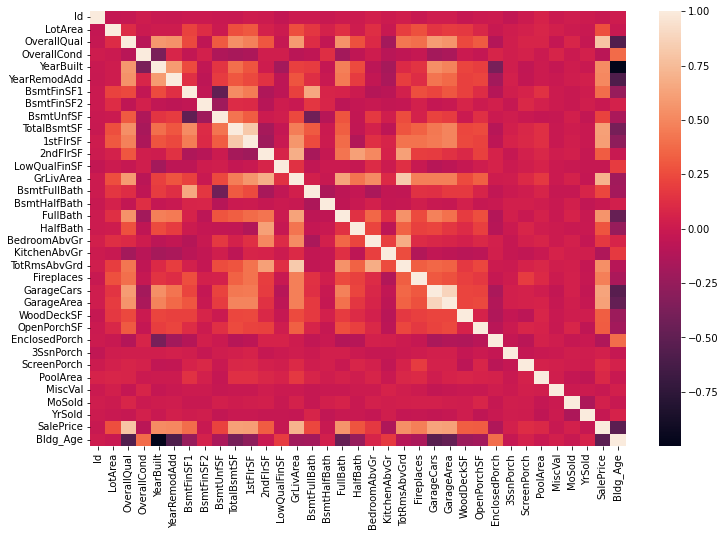

In [10]:
# num_train.corr()
# Increase figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(num_train.corr())
plt.show()

From the heatmap, it states that the OverallQuall, GrLivArea, TotalBsmtSF, 1stFlr, GaraageCars and GarageArea are the top 6 columns that has a high relationships with the SalePrice

In [11]:
price_age = px.scatter(num_train, x= num_train['Bldg_Age'], y='SalePrice', title='Property Age vs Sale Price')
price_age.show()

In [12]:
price_grliveare = px.scatter(num_train, x= num_train['GrLivArea'], y='SalePrice', title='GrLivArea vs Sale Price')
price_grliveare.show()

In [13]:
# Calculate skewness of the 'SalePrice' column
skewness = num_train['SalePrice'].skew()
skewness

1.8828757597682129

In [14]:
fig = px.histogram(num_train, x = "SalePrice",
                   title=(f'Sale Price Distribution (Skewness: {skewness:.2})'),
                   opacity=0.8,)


# Set x and y axis labels
fig.update_xaxes(title_text='SalePrice')
fig.update_yaxes(title_text='Frequency')


fig.show()

In [15]:
cat_cols.append("SalePrice")
cat_train = train[cat_cols]
cat_train.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,YearBuilt_obj,YearRemodAdd_obj,MoSold_obj,YrSold_obj,SalePrice
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,NaN,NaN,NaN,WD,Normal,2003,2003,2,2008,208500
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,NaN,NaN,NaN,WD,Normal,1976,1976,5,2007,181500
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,NaN,NaN,NaN,WD,Normal,2001,2002,9,2008,223500
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,NaN,NaN,NaN,WD,Abnorml,1915,1970,2,2006,140000
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,NaN,NaN,NaN,WD,Normal,2000,2000,12,2008,250000


In [16]:
year = cat_train["YearBuilt_obj"].value_counts()
year_avgprice = cat_train.groupby("YearBuilt_obj")["SalePrice"].mean()

In [17]:
fig = px.bar(cat_train, x=year.index, y=year_avgprice, title="Average Sale Price by Year Built")
fig.show()

In [18]:
neigborhood= cat_train["Neighborhood"].value_counts()
neigborhood_avgprice = cat_train.groupby("Neighborhood")["SalePrice"].mean()

In [19]:
fig = px.bar(cat_train, x=neigborhood.index, y=neigborhood_avgprice , title='Average Sale Price by Neigborhood')
fig.show()

In [20]:
fig = px.box(train, x="Neighborhood", y="SalePrice", title = "Box Plot of SalePrice by Neighborhood")
fig.show()

In [21]:
lotarea_neighborhood = train["Neighborhood"].value_counts()
avg_lotarea_neighborhood  = train.groupby("Neighborhood")["LotArea"].mean()

In [22]:
fig = px.bar(cat_train, x=lotarea_neighborhood.index, y=avg_lotarea_neighborhood, title='Average Lot Area by Neighborhood')
fig.show()

In [23]:
fig = px.box(train, x="Neighborhood", y="LotArea", title = "Box Plot of Lot Area by Neighborhood")
fig.show()

In [24]:
BldgType = cat_train['BldgType'].value_counts()
BldgType_avgprice = cat_train.groupby('BldgType')["SalePrice"].mean()

In [25]:
fig = px.bar(cat_train, x=BldgType .index, y=BldgType_avgprice, title='Average Sale Price by BldgType')
fig.show()

In [26]:
HouseStyle = cat_train["HouseStyle"].value_counts()
HouseStyle_avgprice = cat_train.groupby("HouseStyle")["SalePrice"].mean()

In [27]:
fig = px.bar(cat_train, x=HouseStyle.index, y=HouseStyle_avgprice, title='Average Sale Price by HouseStyle')
fig.show()

In [28]:
Foundation = cat_train["Foundation"].value_counts()
Foundation_avgprice = cat_train.groupby("Foundation")["SalePrice"].mean()

In [29]:
fig = px.bar(cat_train, x=Foundation.index, y=Foundation_avgprice, title='Average Sale Price by Foundation')
fig.show()

In [32]:
electrical = cat_train["Electrical"].value_counts()
electrical_avgprice = cat_train.groupby("Electrical")["SalePrice"].mean()

In [33]:
fig = px.bar(cat_train, x=electrical.index, y=electrical_avgprice, title='Average Sale Price by Electrical Type')
fig.show()

In [35]:
heating = cat_train["Heating"].value_counts()
heating_avgprice = cat_train.groupby("Heating")["SalePrice"].mean()

fig = px.bar(cat_train, x=heating.index, y=heating_avgprice, title='Average Sale Price by Heating Type')
fig.show()

In [36]:
garage= cat_train["GarageType"].value_counts()
garage_avgprice = cat_train.groupby("GarageType")["SalePrice"].mean()

fig = px.bar(cat_train, x=garage.index, y=garage_avgprice, title='Average Sale Price by Garage Type')
fig.show()